# Simple Dashboard of San Fransisco Crime Dataset with Voila

In [4]:
import numpy as np
import pandas as pd
import folium

In [5]:
df = pd.read_csv('SF_crimes.csv')

In [6]:
import ipywidgets as widgets

style = {'description_width': 'initial'}

limit_case = widgets.IntSlider(
    value=1000,
    min=100,
    max=5000,
    step=1,
    description='Max Number of Case:',
    disabled=False,
    style=style)

In [7]:
unique_district = df.PdDistrict.unique()

In [8]:
unique_cat = df.Category.unique()

In [12]:
from ipywidgets import Layout



district = widgets.SelectMultiple(
    options = unique_district.tolist(),
    value = ['BAYVIEW', 'NORTHERN', 'TENDERLOIN'],
    #rows=10,
    description='District',
    disabled=False,
    layout = Layout(width='50%', height='80px')
)

category = widgets.SelectMultiple(
    options = unique_cat.tolist(),
    value = ['VANDALISM', 'ASSAULT', 'ROBBERY'],
    #rows=10,
    description='Criminal Case',
    disabled=False,
    style=style,
    layout = Layout(width='50%', height='80px')
)



In [13]:
import matplotlib.pyplot as plt
from folium import plugins

def update_map(district, category, limit):
    
    df = pd.read_csv('SF_crimes.csv')
    df = df.iloc[0:limit, :]
    
    latitude = 37.77
    longitude = -122.42
    
    df_dist = df.loc[df['PdDistrict'].isin(np.array(district))]
    df_category = df_dist.loc[df_dist['Category'].isin(np.array(category))]
    
    cat_unique = df_category['Category'].value_counts()
    cat_unique = cat_unique.reset_index()
    
    dist_unique = df_category['PdDistrict'].value_counts()
    dist_unique = dist_unique.reset_index()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

    # create map and display it
    sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

    
    incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
    for lat, lng, label, in zip(df_category.Y, df_category.X, df_category.Category):
        folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
        ).add_to(incidents)
# show map
    display(sanfran_map)
    
    ax1.bar(cat_unique['index'], cat_unique['Category'])
    ax1.set_title('Amount of Criminal Case Based on Category')
    ax2.bar(dist_unique['index'], dist_unique['PdDistrict'])
    ax2.set_title('Amount of Criminal Case in Selected District')
    
    plt.show()

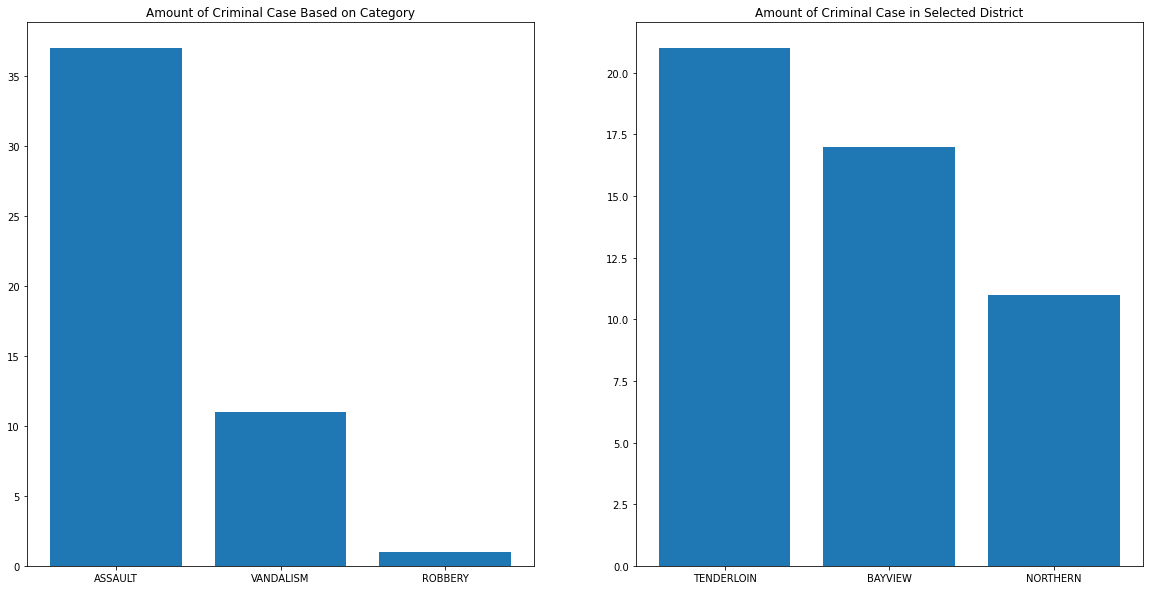

In [14]:

widgets.interactive(update_map, district = district, category = category, limit=limit_case)